# Seaborn 다변량 데이터 시각화

## #01. 기본 준비

### 패키지 참조

In [36]:
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
from pandas import read_excel,concat
import seaborn as sb
import numpy as np

#### 그래프 전역 설정



In [3]:

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 10

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (12,8)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False

### 데이터 준비하기


In [5]:
성적표df = read_excel('https://data.hossam.kr/D01/grade.xlsx', index_col='이름')
성적표df

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,77,88,64
영희,2,여자,88,120,62,72
민철,1,남자,92,70,83,79
수현,3,여자,63,60,31,71
호영,4,남자,75,50,90,88
혜민,4,여자,80,88,91,72
용식,2,남자,82,88,79,90
나영,1,여자,90,92,81,95
석영,4,남자,91,90,89,80


In [6]:
df = 성적표df.astype({"학년": "category", "성별": "category"})
df.dtypes

학년    category
성별    category
국어       int64
영어       int64
수학       int64
과학       int64
dtype: object

## #02. 막대 그래프 그리기

### 1. 기본 사용방법

barplot은 기본적으로 집계가 완료된 데이터를 시각화한다.

x축에 지정된 항목이 중복되지 않는다면 각 집단별 집계결과를 표시한다

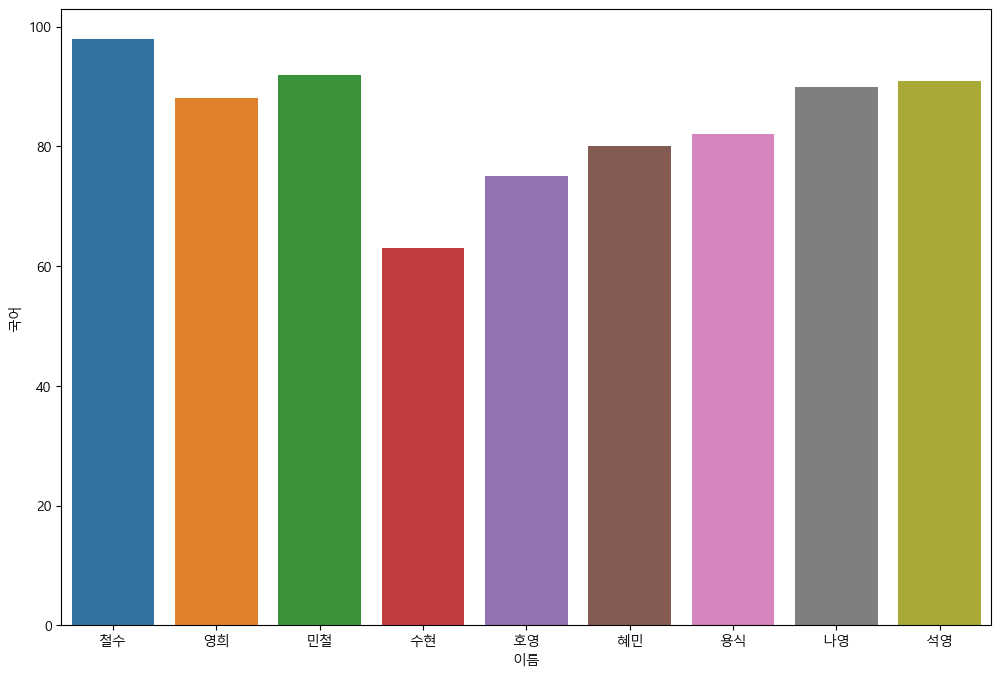

In [7]:
sb.barplot(data=df, x=df.index, y='국어')
plt.show()
plt.close()

### 2.평균 막대 그래프

x축에 지정된 데이터에 중복된 값이 있다면 y축은 평균값을 표시한다

그래프에 표시되는 막대는 95% 신뢰구간을 의미 


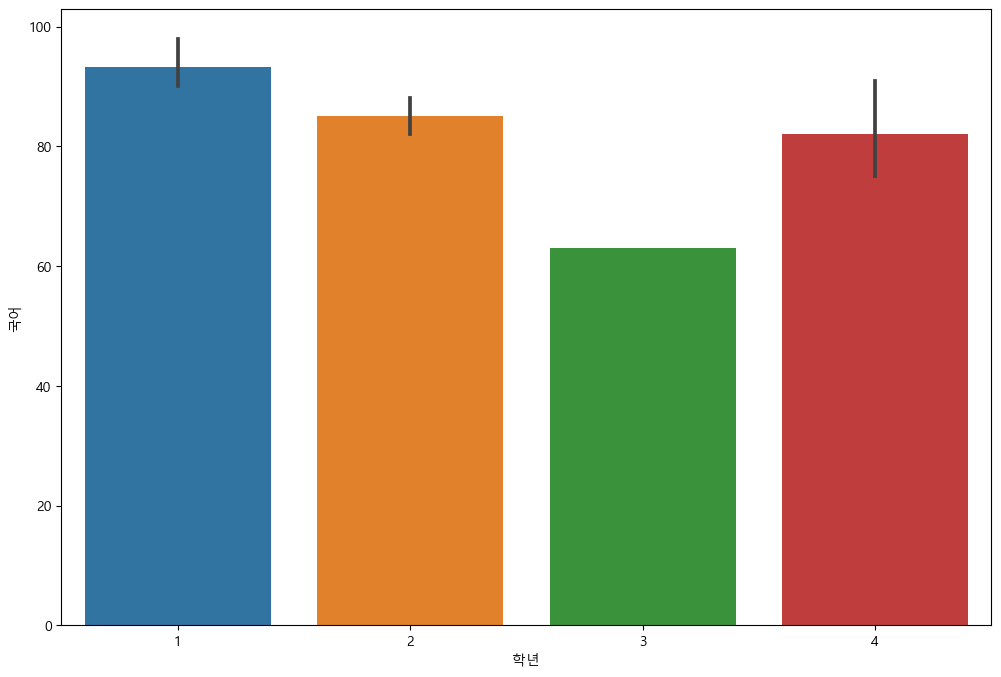

In [9]:
sb.barplot(data=df,x='학년',y='국어')
plt.show()
plt.close()

### 3. 다른 지표 적용하기 

barplot에 함수 estimator 파라미터를 적용하면 다른 지표를 표시할 수 있다 .

#### 합계

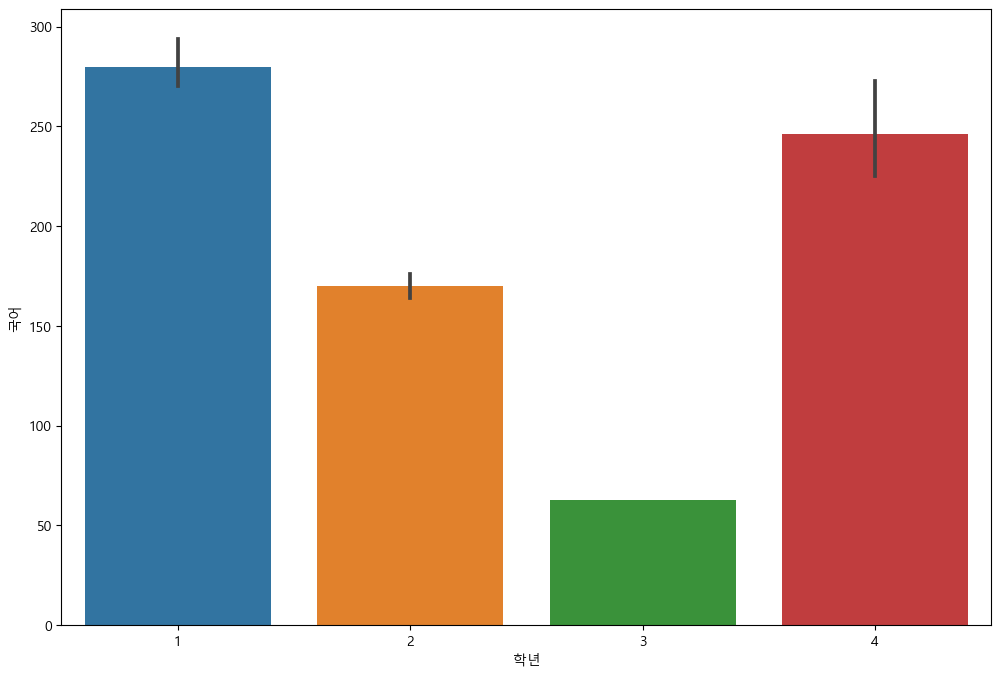

In [12]:
sb.barplot(data=df,x='학년',y='국어',estimator='sum')
plt.show()
plt.close()

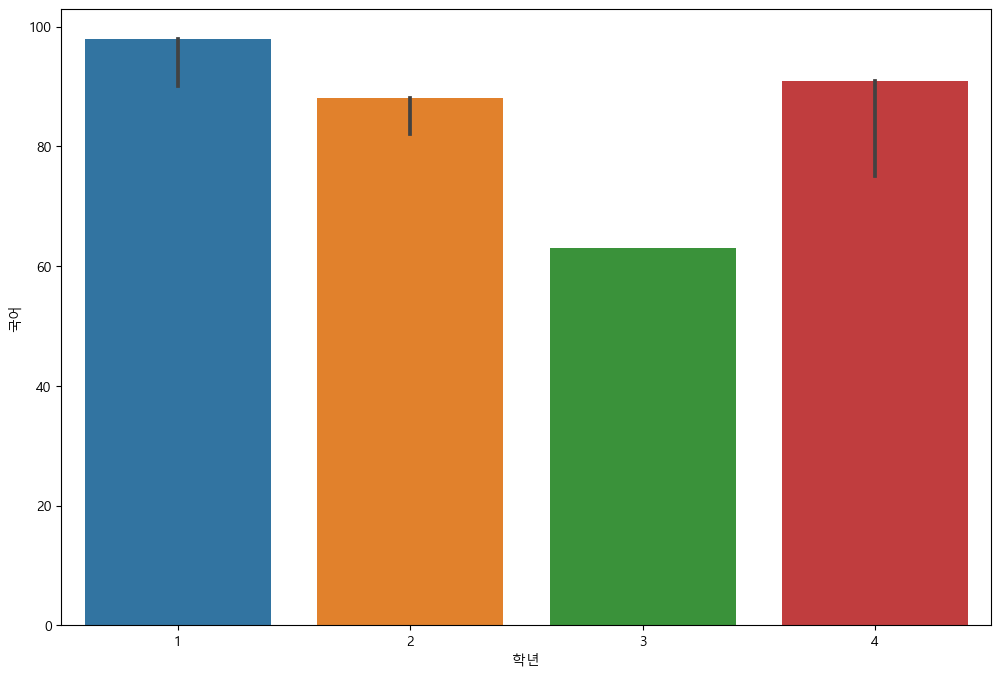

In [13]:
sb.barplot(data=df,x='학년',y='국어',estimator='max')
plt.show()
plt.close()

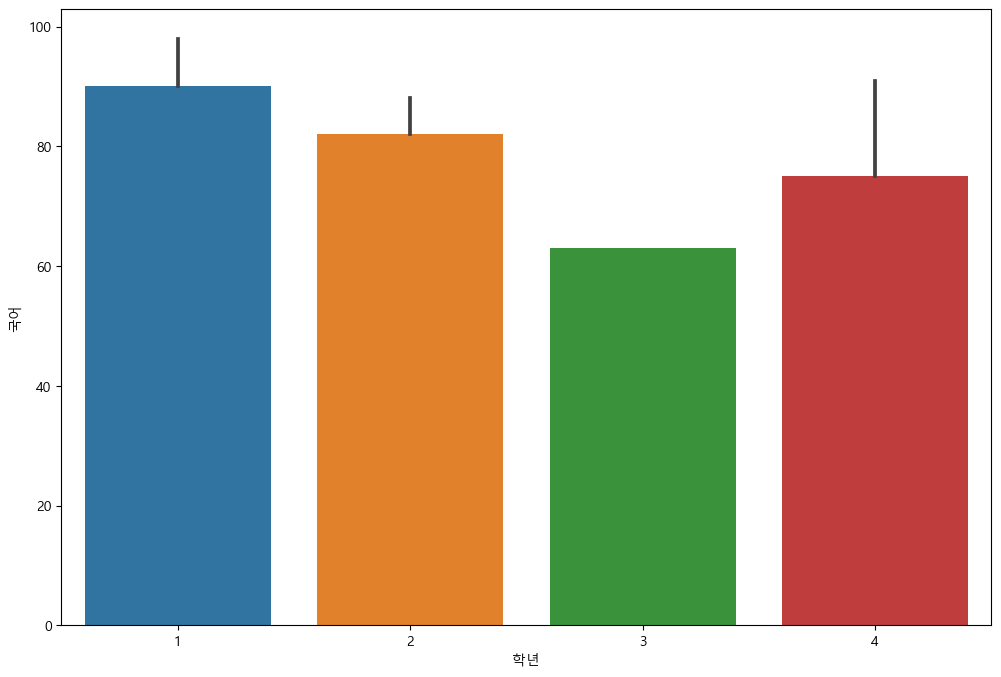

In [14]:
sb.barplot(data=df,x='학년',y='국어',estimator='min')
plt.show()
plt.close()

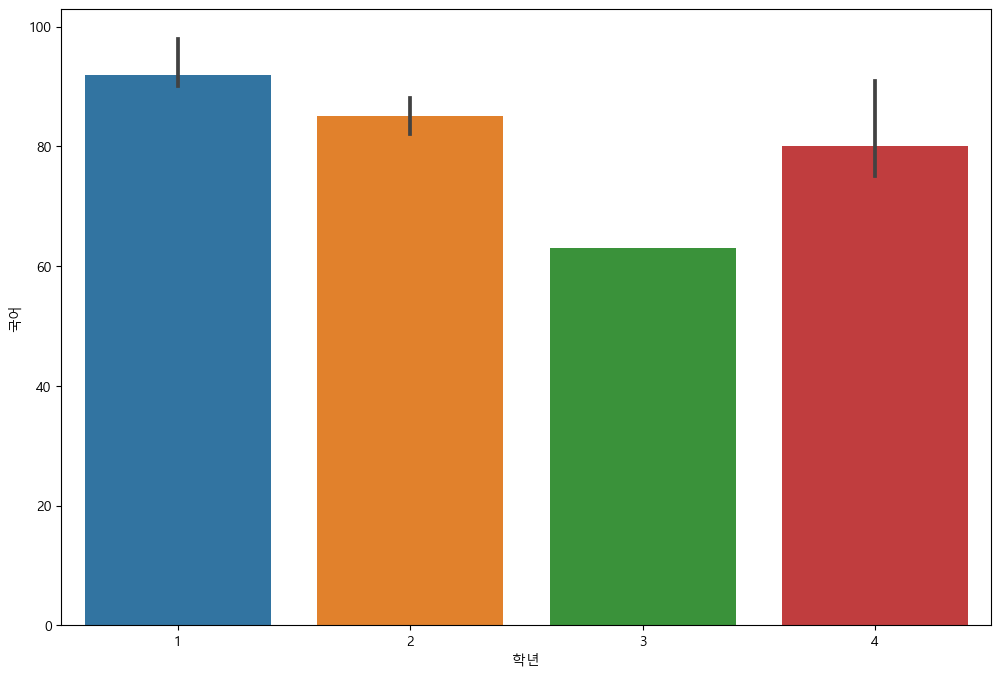

In [15]:
sb.barplot(data=df,x='학년',y='국어',estimator='median')
plt.show()
plt.close()

## #03. 범주에 따른 구분

### hue 파라미터 적용

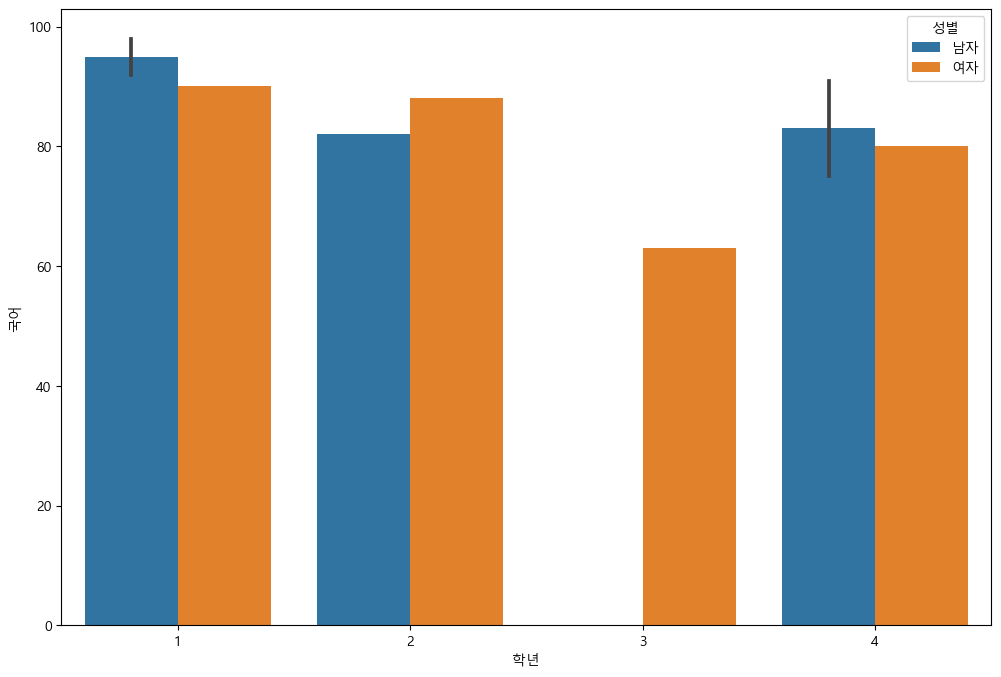

In [16]:
sb.barplot(data=df, x='학년', y='국어', hue='성별', estimator='median')
plt.show()
plt.close()

#### 범주 위치 옮기기

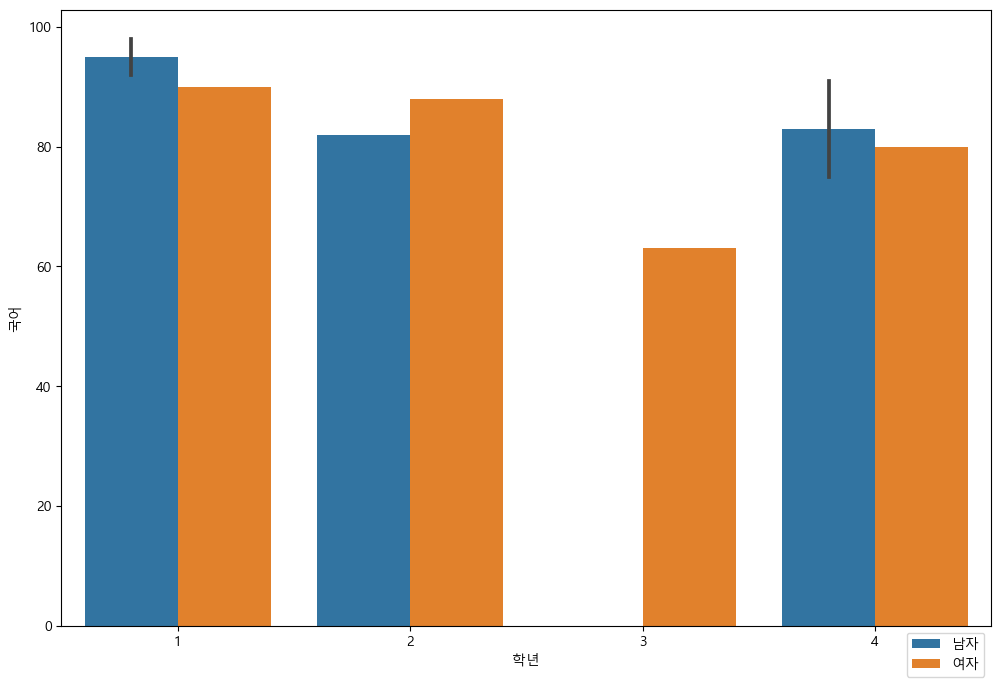

In [18]:
sb.barplot(data=df, x='학년', y='국어', hue='성별', estimator='median')
plt.legend(bbox_to_anchor=(1,0))
plt.show()
plt.close()

#### 범주 적용을 위한 재배치

In [27]:
df1 = df.filter(['국어']).rename(columns={"국어" : "점수"})
df1['과목']='국어'

df1

,점수,과목
이름,,
철수,98,국어
영희,88,국어
민철,92,국어
수현,63,국어
호영,75,국어
혜민,80,국어
용식,82,국어
나영,90,국어
석영,91,국어


In [35]:
df2 = df.filter(["영어"]).rename(columns={"영어" : "점수"})
df2['과목']="영어"
df2

,점수,과목
이름,,
철수,77,영어
영희,120,영어
민철,70,영어
수현,60,영어
호영,50,영어
혜민,88,영어
용식,88,영어
나영,92,영어
석영,90,영어


In [39]:
df3 = pd.concat([df1,df2])
df3

,점수,과목
이름,,
철수,98,국어
영희,88,국어
민철,92,국어
수현,63,국어
호영,75,국어
혜민,80,국어
용식,82,국어
나영,90,국어
석영,91,국어


<Axes: xlabel='이름', ylabel='점수'>

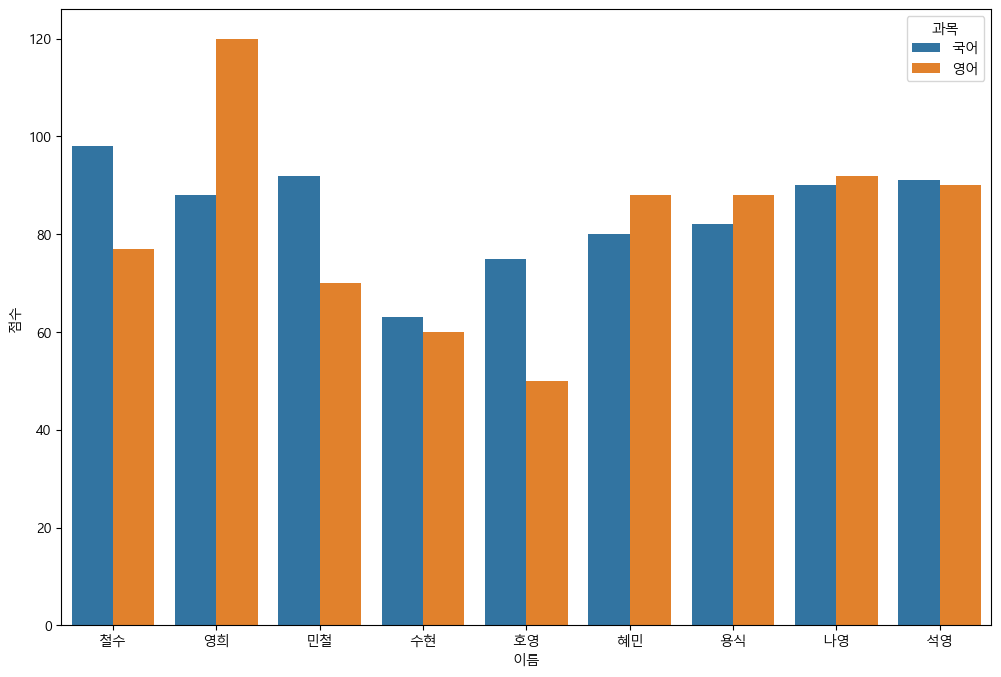

In [40]:
sb.barplot(data=df3,x=df3.index,y="점수",hue="과목")